# TREND ANALYSIS OF ONLINE COURSE "CODEPOLITAN"

Akses File di Google Drive : https://drive.google.com/drive/folders/1ABHOscruLGNnhDx2bNWr8bC7w93uGoBl?usp=drive_link atau https://github.com/bagusbambang/datascienceproject.git

## BUSINESS UNDERSTANDING


**PROBLEM STATEMENT** <br>
##### Platform Codepolitan menghadapi kesulitan dalam mengidentifikasi kursus online yang diminati pengguna, sehingga mempengaruhi strategi pemasaran, pengembangan konten, dan peningkatan pengalaman pengguna. Kurangnya wawasan tentang preferensi pengguna menyebabkan kursus yang tidak tepat sasaran, kehilangan peluang pasar, dan penurunan kepuasan pengguna.<br>
---

**PURPOSE** <br>
Menganalisa tren kursus online pada platform Codepolitan untuk mengidentifikasi dan memberikan wawasan mengenai kursus yang diminati pengguna. Wawasan ini akan didasarkan pada judul kursus, kategori level, jumlah modul, harga, dan rating, yang diharapkan dapat berguna untuk pengembangan bisnis kursus online platform Codepolitan.<br>

---

**RESEARCH QUESTION** <br>
* Kursus online apa yang banyak diminati? <br>
* Berapa jumlah total kursus yang tersedia di platform?<br>
* Berapa jumlah total kursus gratis (Rp.0,-) yang tersedia di platform?<br>
* Kursus online apa yang mendapatkan lebih dari 500 ulasan?<br>
* Berapa level yang tersedia pada kursus?<br>
* Bagaimana distribusi level yang ada pada kursus?<br>
* Bagaimana distribusi rating kursus lebih dari 4.5?<br>
* Bagaimana hubungan antara harga dengan rating?<br>
* Bagaimana hubungan antara harga dengan jumlah peserta?<br>
* Bagaimana hubungan antara rating dengan jumlah peserta ?<br>


---

**BATASAN ANALISIS** <br>
* Hanya memuat informasi data yang tersedia diakses secara publik
* Informasi data yang dianalisa harus menunjukkan tren atau aktivitas pengguna
* Memuat data menggunakan API/JSON dengan status code 200
* Tidak perlu login untuk mendapatkan informasi data
* Apabila terdapat harga yang ditampilkan yang mengharuskan user-login, maka data tidak akan dimuat
* Analisis hanya akan mencakup kursus yang ditampilkan sebagai data terbaru di platform. Jika terdapat label tidak tersedia atau tidak diperbarui, data akan memuat tanggal publikasi yang terlihat paling akhir.
* Informasi data yang tidak lengkap akan diisi dengan nilai 0.

---

**LINK ONLINE COURSE** <br>
https://www.codepolitan.com/

## WORKFLOW

Business Understanding --> Scraping Data --> Data Understanding --> Data Preparation --> Exploratory Data Analysis --> Answer The Research Question --> Conclusion with Recommended

## SCRAPING DATA

In [ ]:
import requests as re
import json
import pandas as pd

In [ ]:
def build_data(data):

  rent_price = data['rent']['normal_price'] if 'rent' in data and data['rent'] else None

  data = {
      'id' : data['id'],
      'title' : data['title'],
      'slug' : data['slug'],
      'cover' : data['cover'],
      'thumbnail' : data['thumbnail'],
      'description' : data['description'],
      'seo_description' : data['seo_description'],
      'status' : data['status'],
      'total_module' : data['total_module'],
      'total_time': data['total_time'],
      'level' : data['level'],
      'author' : data['author'],
      'total' : data['total'],
      'normal_price' : data['normal_price'],
      'retail_price' : data['retail_price'],
      'rent_price': rent_price,
      'total_student' : data['total_student'],
      'total_rating' : data['total_rating'],
      'total_feedback' : data['total_feedback'],
  }

  return data

In [ ]:
final_data = []

for i in range(1,6):
  url = f'https://www.codepolitan.com/_next/data/T-7EvCxIP1Wtj_1sUQpMh/index.json'

  try:
    response = re.get(url)
    response.raise_for_status()
    data = response.json()
    courses = data['pageProps']['popularCourses']
    for course in courses:
      data = build_data(course)
      final_data.append(data)
  except re.exceptions.HTTPError as http_err:
    print(f'HTPP Error: {http_err}')
  except Exception as err:
    print(f'Other Error: {err}')

HTPP Error: 404 Client Error: Not Found for url: https://www.codepolitan.com/_next/data/T-7EvCxIP1Wtj_1sUQpMh/index.json
HTPP Error: 404 Client Error: Not Found for url: https://www.codepolitan.com/_next/data/T-7EvCxIP1Wtj_1sUQpMh/index.json
HTPP Error: 404 Client Error: Not Found for url: https://www.codepolitan.com/_next/data/T-7EvCxIP1Wtj_1sUQpMh/index.json
HTPP Error: 404 Client Error: Not Found for url: https://www.codepolitan.com/_next/data/T-7EvCxIP1Wtj_1sUQpMh/index.json
HTPP Error: 404 Client Error: Not Found for url: https://www.codepolitan.com/_next/data/T-7EvCxIP1Wtj_1sUQpMh/index.json


In [ ]:
final_df = pd.DataFrame(final_data)
final_df

""


In [ ]:
final_df.to_csv('final_df.csv')

## DATA UNDERSTANDING

- id: Identifikasi unik untuk setiap kursus.<br>
- title: Judul dari kursus.<br>
- slug: Nama pendek yang digunakan sebagai bagian URL untuk kursus tersebut.<br>
- cover: Gambar sampul kursus pada tabel berbentuk URL.<br>
- thumbnail: Gambar thumbnail versi kecil dari sampul.<br>
- description: Deskripsi singkat mengenai kursus.<br>
- seo_description: Deskripsi SEO (tidak selalu diisi) untuk membantu optimasi mesin pencari.<br>
- status: Status publikasi kursus.<br>
- total_module: Jumlah modul yang tersedia dalam kursus.<br>
- total_time: Durasi total kursus dalam satuan waktu tertentu.<br>
- level: Tingkat kesulitan kursus (misalnya, beginner, intermediate, atau advanced).<br>
- author: Nama pengajar atau pembuat kursus.<br>
- total: Jumlah materi atau unit yang disediakan dalam kursus.<br>
- normal_price: Harga normal kursus (sebelum diskon).<br>
- retail_price: Harga jual kursus (setelah diskon, jika ada).<br>
- rent_price: Harga sewa kursus.<br>
- total_student: Jumlah siswa yang telah mengikuti kursus.<br>
- total_rating: Rata-rata rating yang diberikan oleh siswa (dalam skala tertentu, misalnya 1–5).<br>
- total_feedback: Jumlah ulasan atau masukan yang diberikan oleh siswa.

CATATAN PENTING : UNTUK RUNNING CODE LANGSUNG SAJA KE DATA PREPARATION, TIDAK PERLU KE SCRAPING DATA LAGI

## DATA PREPARATION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('df_codepolitan.csv')
df.head()

,Unnamed: 0,id,title,slug,cover,thumbnail,description,seo_description,status,total_module,total_time,level,author,total,normal_price,retail_price,rent_price,total_student,total_rating,total_feedback
0,0,375,Panduan Awal Menjadi Fullstack Web Developer,panduan-awal-menjadi-fullstack-web-developer,https://image.web.id/images/coverpanduan.jpg,https://image.web.id/images/coverpanduan.jpg,Kelas ini dirancang untuk memberikan gambaran ...,NaN,publish,5,1,beginner,Sandhika Galih,2355,59000,29000,NaN,0,4.9,100
1,1,63,Studi Kasus Web Geolocation dengan Laravel dan...,studi-kasus-web-geolocation-dengan-laravel-dan...,https://image.web.id/images/Studi-Kasus-Web-Ge...,https://image.web.id/images/Studi-Kasus-Web-Ge...,Belajar membuat aplikasi web yang terintegrasi...,NaN,publish,21,2,beginner,Ahmad Hakim,2246,149000,149000,49000.0,2520,4.8,159
2,2,51,Membangun Website Toko Online Berbasis CodeIgn...,membangun-website-toko-online-berbasis-codeign...,https://image.web.id/images/Membangun-Website-...,https://image.web.id/images/Membangun-Website-...,Belajar membangun website toko online dengan m...,Belajar membangun website toko online dengan m...,publish,103,15,beginner,Ahmad Hakim,273,299000,299000,119000.0,3011,4.8,219
3,3,49,Belajar Cepat Membuat Web App Berbasis React,belajar-react-js,https://image.web.id/images/Belajar-Cepat-Memb...,https://image.web.id/images/Belajar-Cepat-Memb...,Panduan langkah demi langkah untuk belajar pem...,Panduan langkah demi langkah untuk belajar pem...,publish,49,3,beginner,Bagus Budi Cahyono,241,199000,199000,79000.0,1925,4.6,171
4,4,42,Belajar Pemrograman PHP,basic-php,https://image.web.id/images/Belajar-Pemrograma...,https://image.web.id/images/Belajar-Pemrograma...,Panduan langkah demi langkah untuk belajar pem...,Panduan langkah demi langkah untuk belajar pem...,publish,46,4,beginner,Toni Haryanto,187,199000,199000,79000.0,5991,4.8,869


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       250 non-null    int64  
 1   id               250 non-null    int64  
 2   title            250 non-null    object 
 3   slug             250 non-null    object 
 4   cover            250 non-null    object 
 5   thumbnail        250 non-null    object 
 6   description      250 non-null    object 
 7   seo_description  20 non-null     object 
 8   status           250 non-null    object 
 9   total_module     250 non-null    int64  
 10  total_time       250 non-null    int64  
 11  level            250 non-null    object 
 12  author           245 non-null    object 
 13  total            250 non-null    int64  
 14  normal_price     250 non-null    int64  
 15  retail_price     250 non-null    int64  
 16  rent_price       245 non-null    float64
 17  total_student   

In [ ]:
df.shape

(250, 20)

In [ ]:
df.describe()

,Unnamed: 0,id,total_module,total_time,total,normal_price,retail_price,rent_price,total_student,total_rating,total_feedback
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,245.000000,250.000000,250.000000,250.000000
mean,124.500000,136.280000,39.500000,4.220000,147.800000,204360.000000,195940.000000,58571.428571,853.820000,4.680000,186.440000
std,72.312977,82.153505,28.747795,4.219338,456.983254,80805.622294,81210.572145,26773.182080,1086.304311,0.688984,359.139599
min,0.000000,42.000000,4.000000,1.000000,13.000000,59000.000000,29000.000000,0.000000,0.000000,0.000000,0.000000
25%,62.250000,63.000000,19.000000,2.000000,22.000000,149000.000000,149000.000000,49000.000000,113.000000,4.700000,21.000000
50%,124.500000,97.500000,29.000000,3.000000,30.500000,199000.000000,149000.000000,49000.000000,506.000000,4.800000,85.500000
75%,186.750000,198.000000,59.000000,5.000000,72.000000,249000.000000,199000.000000,79000.000000,1121.000000,4.800000,165.000000
max,249.000000,375.000000,125.000000,24.000000,2476.000000,400000.000000,400000.000000,119000.000000,5991.000000,5.000000,2155.000000


In [ ]:
print(df['status'].unique())
print(df['level'].unique())

['publish']
['beginner' 'intermediate']


#### Cek jumlah data yang NULL

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
title,0
slug,0
cover,0
thumbnail,0
description,0
seo_description,230
status,0
total_module,0


In [ ]:
df.isnull()

,Unnamed: 0,id,title,slug,cover,thumbnail,description,seo_description,status,total_module,total_time,level,author,total,normal_price,retail_price,rent_price,total_student,total_rating,total_feedback
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
seo_description,230,0.92
rent_price,5,0.02
author,5,0.02
Unnamed: 0,0,0.00
level,0,0.00
total_rating,0,0.00
total_student,0,0.00
retail_price,0,0.00
normal_price,0,0.00
total,0,0.00


* Data kosong terbanyak pada kolom seo_description

#### Cek data kosong pada kolom yang memiliki data kosong

In [ ]:
df.loc[:,('seo_description','rent_price','author')]

,seo_description,rent_price,author
0,NaN,NaN,Sandhika Galih
1,NaN,49000.0,Ahmad Hakim
2,Belajar membangun website toko online dengan m...,119000.0,Ahmad Hakim
3,Panduan langkah demi langkah untuk belajar pem...,79000.0,Bagus Budi Cahyono
4,Panduan langkah demi langkah untuk belajar pem...,79000.0,Toni Haryanto
...,...,...,...
245,NaN,49000.0,Aulia Rahman
246,NaN,49000.0,Yusuf Fazeri
247,NaN,49000.0,NaN
248,NaN,49000.0,Ahmad Hakim


#### mengisi data yang kosong dengan value 0

In [ ]:
df['rent_price'] = df['rent_price'].fillna(0)


In [ ]:
df['author'] = df['author'].fillna(0)

In [ ]:
df

,Unnamed: 0,id,title,slug,cover,thumbnail,description,seo_description,status,total_module,total_time,level,author,total,normal_price,retail_price,rent_price,total_student,total_rating,total_feedback
0,0,375,Panduan Awal Menjadi Fullstack Web Developer,panduan-awal-menjadi-fullstack-web-developer,https://image.web.id/images/coverpanduan.jpg,https://image.web.id/images/coverpanduan.jpg,Kelas ini dirancang untuk memberikan gambaran ...,NaN,publish,5,1,beginner,Sandhika Galih,2476,59000,29000,0.0,0,4.9,109
1,1,63,Studi Kasus Web Geolocation dengan Laravel dan...,studi-kasus-web-geolocation-dengan-laravel-dan...,https://image.web.id/images/Studi-Kasus-Web-Ge...,https://image.web.id/images/Studi-Kasus-Web-Ge...,Belajar membuat aplikasi web yang terintegrasi...,NaN,publish,21,2,beginner,Ahmad Hakim,2247,149000,149000,49000.0,2520,4.8,159
2,2,51,Membangun Website Toko Online Berbasis CodeIgn...,membangun-website-toko-online-berbasis-codeign...,https://image.web.id/images/Membangun-Website-...,https://image.web.id/images/Membangun-Website-...,Belajar membangun website toko online dengan m...,Belajar membangun website toko online dengan m...,publish,103,15,beginner,Ahmad Hakim,273,299000,299000,119000.0,3012,4.8,219
3,3,49,Belajar Cepat Membuat Web App Berbasis React,belajar-react-js,https://image.web.id/images/Belajar-Cepat-Memb...,https://image.web.id/images/Belajar-Cepat-Memb...,Panduan langkah demi langkah untuk belajar pem...,Panduan langkah demi langkah untuk belajar pem...,publish,49,3,beginner,Bagus Budi Cahyono,243,199000,199000,79000.0,1925,4.6,171
4,4,42,Belajar Pemrograman PHP,basic-php,https://image.web.id/images/Belajar-Pemrograma...,https://image.web.id/images/Belajar-Pemrograma...,Panduan langkah demi langkah untuk belajar pem...,Panduan langkah demi langkah untuk belajar pem...,publish,46,4,beginner,Toni Haryanto,187,199000,199000,79000.0,5991,4.8,869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,62,Implementasi Firebase Auth di Android - Kotlin,implementasi-firebase-auth-di-android,https://image.web.id/images/Implementasi-Fireb...,https://image.web.id/images/Implementasi-Fireb...,Manfaatkan fitur otentikasi yang disediakan ol...,NaN,publish,17,4,beginner,Aulia Rahman,15,149000,149000,49000.0,797,4.6,84
246,246,150,Membuat Website Profile Perusahaan Tanpa Codin...,membuat-website-profile-perusahaan-tanpa-codin...,https://image.web.id/images/Membuat-Website-Pr...,https://image.web.id/images/Membuat-Website-Pr...,Kemajuan teknologi saat ini bukan hanya mengha...,NaN,publish,25,1,beginner,Yusuf Fazeri,15,149000,149000,49000.0,225,4.9,42
247,247,185,Belajar Dasar CSS,belajar-dasar-css,https://image.web.id/images/Belajar-Dasar-CSS.png,https://image.web.id/images/Belajar-Dasar-CSS.png,Mengenal dan belajar dasar-dasar CSS untuk fon...,NaN,publish,39,3,beginner,0,14,149000,149000,49000.0,1198,4.7,1201
248,248,79,Membangun Aplikasi Cek Ongkir Menggunakan Laravel,membangun-aplikasi-cek-ongkir-menggunakan-laravel,https://image.web.id/images/Membangun-Aplikasi...,https://image.web.id/images/Membangun-Aplikasi...,"Dalam kelas online ini, kamu akan belajar lang...",NaN,publish,13,1,intermediate,Ahmad Hakim,13,149000,149000,49000.0,715,4.8,96


Identifikasi Outlier

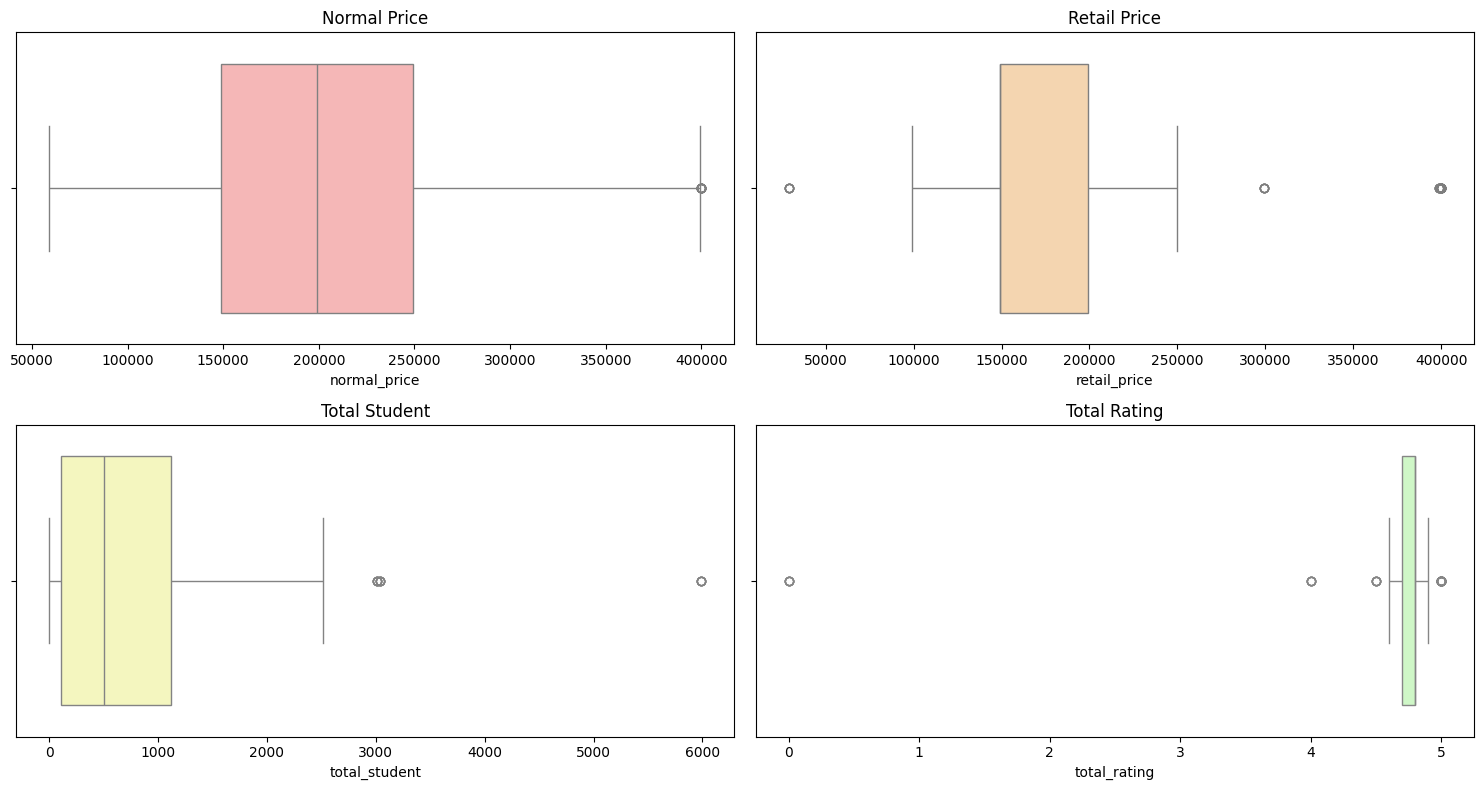

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

plt.setp(ax[0, 0], title='Normal Price')
sns.boxplot(df['normal_price'], orient='h', ax=ax[0, 0], color='#ffadad')

plt.setp(ax[0, 1], title='Retail Price')
sns.boxplot(df['retail_price'], orient='h', ax=ax[0, 1], color='#ffd6a5')

plt.setp(ax[1, 0], title='Total Student')
sns.boxplot(df['total_student'], orient='h', ax=ax[1, 0], color='#fdffb6')

plt.setp(ax[1, 1], title='Total Rating')
sns.boxplot(df['total_rating'], orient='h', ax=ax[1, 1], color='#caffbf')

plt.tight_layout()
plt.show()

Feature Engineering

In [ ]:
df['discount'] = df['normal_price'] - df['retail_price']

In [ ]:
print("Uniq Value pada kolom 'discount':")
print(df['discount'].unique())

discounted_count = df[df['discount'] > 0].shape[0]
print(f"\nJumlah data yang memiliki diskon: {discounted_count}")

Uniq Value pada kolom 'discount':
[ 30000      0 240000 151000]

Jumlah data yang memiliki diskon: 15


In [ ]:
df

,Unnamed: 0,id,title,slug,cover,thumbnail,description,seo_description,status,total_module,...,level,author,total,normal_price,retail_price,rent_price,total_student,total_rating,total_feedback,discount
0,0,375,Panduan Awal Menjadi Fullstack Web Developer,panduan-awal-menjadi-fullstack-web-developer,https://image.web.id/images/coverpanduan.jpg,https://image.web.id/images/coverpanduan.jpg,Kelas ini dirancang untuk memberikan gambaran ...,NaN,publish,5,...,beginner,Sandhika Galih,2476,59000,29000,0.0,0,4.9,109,30000
1,1,63,Studi Kasus Web Geolocation dengan Laravel dan...,studi-kasus-web-geolocation-dengan-laravel-dan...,https://image.web.id/images/Studi-Kasus-Web-Ge...,https://image.web.id/images/Studi-Kasus-Web-Ge...,Belajar membuat aplikasi web yang terintegrasi...,NaN,publish,21,...,beginner,Ahmad Hakim,2247,149000,149000,49000.0,2520,4.8,159,0
2,2,51,Membangun Website Toko Online Berbasis CodeIgn...,membangun-website-toko-online-berbasis-codeign...,https://image.web.id/images/Membangun-Website-...,https://image.web.id/images/Membangun-Website-...,Belajar membangun website toko online dengan m...,Belajar membangun website toko online dengan m...,publish,103,...,beginner,Ahmad Hakim,273,299000,299000,119000.0,3012,4.8,219,0
3,3,49,Belajar Cepat Membuat Web App Berbasis React,belajar-react-js,https://image.web.id/images/Belajar-Cepat-Memb...,https://image.web.id/images/Belajar-Cepat-Memb...,Panduan langkah demi langkah untuk belajar pem...,Panduan langkah demi langkah untuk belajar pem...,publish,49,...,beginner,Bagus Budi Cahyono,243,199000,199000,79000.0,1925,4.6,171,0
4,4,42,Belajar Pemrograman PHP,basic-php,https://image.web.id/images/Belajar-Pemrograma...,https://image.web.id/images/Belajar-Pemrograma...,Panduan langkah demi langkah untuk belajar pem...,Panduan langkah demi langkah untuk belajar pem...,publish,46,...,beginner,Toni Haryanto,187,199000,199000,79000.0,5991,4.8,869,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,62,Implementasi Firebase Auth di Android - Kotlin,implementasi-firebase-auth-di-android,https://image.web.id/images/Implementasi-Fireb...,https://image.web.id/images/Implementasi-Fireb...,Manfaatkan fitur otentikasi yang disediakan ol...,NaN,publish,17,...,beginner,Aulia Rahman,15,149000,149000,49000.0,797,4.6,84,0
246,246,150,Membuat Website Profile Perusahaan Tanpa Codin...,membuat-website-profile-perusahaan-tanpa-codin...,https://image.web.id/images/Membuat-Website-Pr...,https://image.web.id/images/Membuat-Website-Pr...,Kemajuan teknologi saat ini bukan hanya mengha...,NaN,publish,25,...,beginner,Yusuf Fazeri,15,149000,149000,49000.0,225,4.9,42,0
247,247,185,Belajar Dasar CSS,belajar-dasar-css,https://image.web.id/images/Belajar-Dasar-CSS.png,https://image.web.id/images/Belajar-Dasar-CSS.png,Mengenal dan belajar dasar-dasar CSS untuk fon...,NaN,publish,39,...,beginner,0,14,149000,149000,49000.0,1198,4.7,1201,0
248,248,79,Membangun Aplikasi Cek Ongkir Menggunakan Laravel,membangun-aplikasi-cek-ongkir-menggunakan-laravel,https://image.web.id/images/Membangun-Aplikasi...,https://image.web.id/images/Membangun-Aplikasi...,"Dalam kelas online ini, kamu akan belajar lang...",NaN,publish,13,...,intermediate,Ahmad Hakim,13,149000,149000,49000.0,715,4.8,96,0


Encoding data pada kolom Level

* beginner : 1
* intermediate : 2
* advanced : 3


In [ ]:
level_mapping = {'beginner': 1, 'intermediate': 2, 'advanced': 3}
df['level_encoded'] = df['level'].map(level_mapping)

In [ ]:
df

,Unnamed: 0,id,title,slug,cover,thumbnail,description,seo_description,status,total_module,...,author,total,normal_price,retail_price,rent_price,total_student,total_rating,total_feedback,discount,level_encoded
0,0,375,Panduan Awal Menjadi Fullstack Web Developer,panduan-awal-menjadi-fullstack-web-developer,https://image.web.id/images/coverpanduan.jpg,https://image.web.id/images/coverpanduan.jpg,Kelas ini dirancang untuk memberikan gambaran ...,NaN,publish,5,...,Sandhika Galih,2476,59000,29000,0.0,0,4.9,109,30000,1
1,1,63,Studi Kasus Web Geolocation dengan Laravel dan...,studi-kasus-web-geolocation-dengan-laravel-dan...,https://image.web.id/images/Studi-Kasus-Web-Ge...,https://image.web.id/images/Studi-Kasus-Web-Ge...,Belajar membuat aplikasi web yang terintegrasi...,NaN,publish,21,...,Ahmad Hakim,2247,149000,149000,49000.0,2520,4.8,159,0,1
2,2,51,Membangun Website Toko Online Berbasis CodeIgn...,membangun-website-toko-online-berbasis-codeign...,https://image.web.id/images/Membangun-Website-...,https://image.web.id/images/Membangun-Website-...,Belajar membangun website toko online dengan m...,Belajar membangun website toko online dengan m...,publish,103,...,Ahmad Hakim,273,299000,299000,119000.0,3012,4.8,219,0,1
3,3,49,Belajar Cepat Membuat Web App Berbasis React,belajar-react-js,https://image.web.id/images/Belajar-Cepat-Memb...,https://image.web.id/images/Belajar-Cepat-Memb...,Panduan langkah demi langkah untuk belajar pem...,Panduan langkah demi langkah untuk belajar pem...,publish,49,...,Bagus Budi Cahyono,243,199000,199000,79000.0,1925,4.6,171,0,1
4,4,42,Belajar Pemrograman PHP,basic-php,https://image.web.id/images/Belajar-Pemrograma...,https://image.web.id/images/Belajar-Pemrograma...,Panduan langkah demi langkah untuk belajar pem...,Panduan langkah demi langkah untuk belajar pem...,publish,46,...,Toni Haryanto,187,199000,199000,79000.0,5991,4.8,869,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,62,Implementasi Firebase Auth di Android - Kotlin,implementasi-firebase-auth-di-android,https://image.web.id/images/Implementasi-Fireb...,https://image.web.id/images/Implementasi-Fireb...,Manfaatkan fitur otentikasi yang disediakan ol...,NaN,publish,17,...,Aulia Rahman,15,149000,149000,49000.0,797,4.6,84,0,1
246,246,150,Membuat Website Profile Perusahaan Tanpa Codin...,membuat-website-profile-perusahaan-tanpa-codin...,https://image.web.id/images/Membuat-Website-Pr...,https://image.web.id/images/Membuat-Website-Pr...,Kemajuan teknologi saat ini bukan hanya mengha...,NaN,publish,25,...,Yusuf Fazeri,15,149000,149000,49000.0,225,4.9,42,0,1
247,247,185,Belajar Dasar CSS,belajar-dasar-css,https://image.web.id/images/Belajar-Dasar-CSS.png,https://image.web.id/images/Belajar-Dasar-CSS.png,Mengenal dan belajar dasar-dasar CSS untuk fon...,NaN,publish,39,...,0,14,149000,149000,49000.0,1198,4.7,1201,0,1
248,248,79,Membangun Aplikasi Cek Ongkir Menggunakan Laravel,membangun-aplikasi-cek-ongkir-menggunakan-laravel,https://image.web.id/images/Membangun-Aplikasi...,https://image.web.id/images/Membangun-Aplikasi...,"Dalam kelas online ini, kamu akan belajar lang...",NaN,publish,13,...,Ahmad Hakim,13,149000,149000,49000.0,715,4.8,96,0,2


#### membuang kolom yang tidak digunakan untuk analisa

In [ ]:
df_drop = ['id','Unnamed: 0','slug','seo_description','description','thumbnail','cover']
df.drop(columns=df_drop,inplace=True)
df.head()

,title,status,total_module,total_time,level,author,total,normal_price,retail_price,rent_price,total_student,total_rating,total_feedback,discount,level_encoded
0,Panduan Awal Menjadi Fullstack Web Developer,publish,5,1,beginner,Sandhika Galih,2476,59000,29000,0.0,0,4.9,109,30000,1
1,Studi Kasus Web Geolocation dengan Laravel dan...,publish,21,2,beginner,Ahmad Hakim,2247,149000,149000,49000.0,2520,4.8,159,0,1
2,Membangun Website Toko Online Berbasis CodeIgn...,publish,103,15,beginner,Ahmad Hakim,273,299000,299000,119000.0,3012,4.8,219,0,1
3,Belajar Cepat Membuat Web App Berbasis React,publish,49,3,beginner,Bagus Budi Cahyono,243,199000,199000,79000.0,1925,4.6,171,0,1
4,Belajar Pemrograman PHP,publish,46,4,beginner,Toni Haryanto,187,199000,199000,79000.0,5991,4.8,869,0,1


#### split data menjadi data numerikal dan data kategorikal

##### data numerikal

In [ ]:
num_cols = df._get_numeric_data().columns
codepolitan_numeric= df[num_cols]
codepolitan_numeric

,total_module,total_time,total,normal_price,retail_price,rent_price,total_student,total_rating,total_feedback,discount,level_encoded
0,5,1,2476,59000,29000,0.0,0,4.9,109,30000,1
1,21,2,2247,149000,149000,49000.0,2520,4.8,159,0,1
2,103,15,273,299000,299000,119000.0,3012,4.8,219,0,1
3,49,3,243,199000,199000,79000.0,1925,4.6,171,0,1
4,46,4,187,199000,199000,79000.0,5991,4.8,869,0,1
...,...,...,...,...,...,...,...,...,...,...,...
245,17,4,15,149000,149000,49000.0,797,4.6,84,0,1
246,25,1,15,149000,149000,49000.0,225,4.9,42,0,1
247,39,3,14,149000,149000,49000.0,1198,4.7,1201,0,1
248,13,1,13,149000,149000,49000.0,715,4.8,96,0,2


##### data kategorikal

In [ ]:
codepolitan_categorical = df.drop(num_cols,axis=1)
codepolitan_categorical

,title,status,level,author
0,Panduan Awal Menjadi Fullstack Web Developer,publish,beginner,Sandhika Galih
1,Studi Kasus Web Geolocation dengan Laravel dan...,publish,beginner,Ahmad Hakim
2,Membangun Website Toko Online Berbasis CodeIgn...,publish,beginner,Ahmad Hakim
3,Belajar Cepat Membuat Web App Berbasis React,publish,beginner,Bagus Budi Cahyono
4,Belajar Pemrograman PHP,publish,beginner,Toni Haryanto
...,...,...,...,...
245,Implementasi Firebase Auth di Android - Kotlin,publish,beginner,Aulia Rahman
246,Membuat Website Profile Perusahaan Tanpa Codin...,publish,beginner,Yusuf Fazeri
247,Belajar Dasar CSS,publish,beginner,0
248,Membangun Aplikasi Cek Ongkir Menggunakan Laravel,publish,intermediate,Ahmad Hakim


##### eksport data numerikal dan data kegorikal menjadi dataset format csv

In [ ]:
codepolitan_numeric.to_csv('df_numeric.csv')
codepolitan_categorical.to_csv('df_categorical.csv')

## EXPLORATORY DATA ANALYSIS

Link akses data:

Data categorical--> https://raw.githubusercontent.com/bagusbambang/datascienceproject/refs/heads/Project-5--Codepolitan-Trend-Analysis/df_categorical.csv

Data numerical --> https://raw.githubusercontent.com/bagusbambang/datascienceproject/refs/heads/Project-5--Codepolitan-Trend-Analysis/df_numeric.csv

Dataset sebelum di wragling --> https://raw.githubusercontent.com/bagusbambang/datascienceproject/refs/heads/Project-5--Codepolitan-Trend-Analysis/df_codepolitan.csv

# EDA NUMERIC

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kurtosis
import matplotlib.pyplot as plt

In [ ]:
df_numeric = pd.read_csv('https://raw.githubusercontent.com/bagusbambang/datascienceproject/refs/heads/Project-5--Codepolitan-Trend-Analysis/df_numeric.csv')
df_numeric.head()

,Unnamed: 0.1,Unnamed: 0,total_module,total_time,total,normal_price,retail_price,rent_price,total_student,total_rating,total_feedback
0,0,0,5,1,2355,59000,29000,0.0,0,4.9,100
1,1,1,21,2,2246,149000,149000,49000.0,2520,4.8,159
2,2,2,103,15,273,299000,299000,119000.0,3011,4.8,219
3,3,3,49,3,241,199000,199000,79000.0,1925,4.6,171
4,4,4,46,4,187,199000,199000,79000.0,5991,4.8,869


In [ ]:
# 1. Statistik Deskriptif
print(df_numeric.describe())

       Unnamed: 0.1  Unnamed: 0  total_module  total_time        total  \
count    250.000000  250.000000    250.000000  250.000000   250.000000   
mean     124.500000  124.500000     39.500000    4.220000   145.260000   
std       72.312977   72.312977     28.747795    4.219338   444.664027   
min        0.000000    0.000000      4.000000    1.000000    13.000000   
25%       62.250000   62.250000     19.000000    2.000000    21.000000   
50%      124.500000  124.500000     29.000000    3.000000    30.500000   
75%      186.750000  186.750000     59.000000    5.000000    72.000000   
max      249.000000  249.000000    125.000000   24.000000  2355.000000   

        normal_price   retail_price     rent_price  total_student  \
count     250.000000     250.000000     250.000000     250.000000   
mean   204360.000000  195940.000000   57400.000000     853.800000   
std     80805.622294   81210.572145   27747.426524    1086.264425   
min     59000.000000   29000.000000       0.000000       

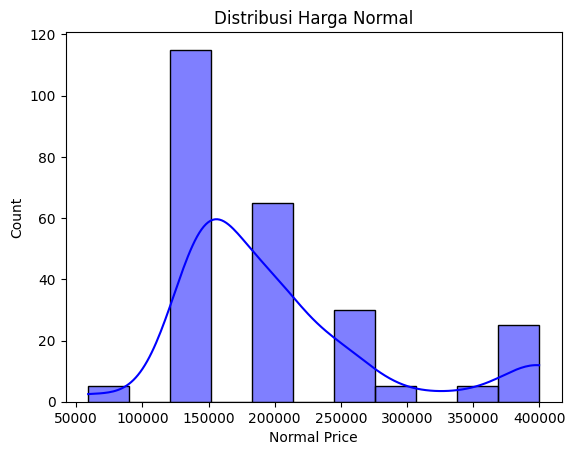

In [ ]:
# 2. Distribusi Harga
sns.histplot(df_numeric['normal_price'], kde=True, color='blue')
plt.title('Distribusi Harga Normal')
plt.xlabel('Normal Price')
plt.show()

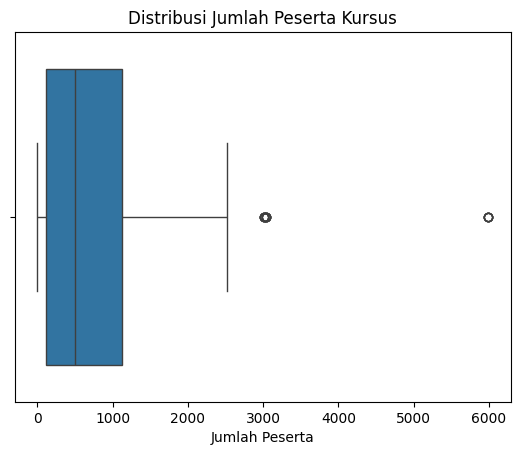

In [ ]:
# 3. Boxplot Jumlah Peserta
sns.boxplot(data=df_numeric, x=df_numeric['total_student'])
plt.title('Distribusi Jumlah Peserta Kursus')
plt.xlabel('Jumlah Peserta')
plt.show()

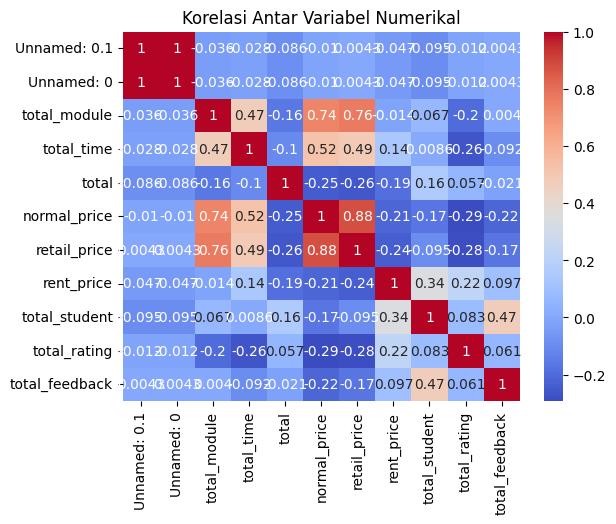

In [ ]:
# 4. Korelasi Antar Variabel Numerikal
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerikal')
plt.show()

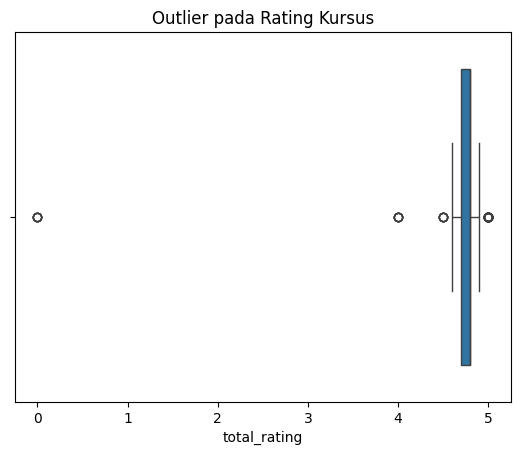

In [ ]:
# 5. Identifikasi Outlier pada Rating
sns.boxplot(x=df_numeric['total_rating'])
plt.title('Outlier pada Rating Kursus')
plt.show()

In [ ]:
# menghitung kurtosis
numerical_columns = df_numeric.select_dtypes(include=['number'])

# Hitung kurtosis untuk setiap kolom numerik
kurtosis_values = numerical_columns.apply(kurtosis, fisher=True)
print("Kurtosis untuk data numerik:")
print(kurtosis_values)

Kurtosis untuk data numerik:
Unnamed: 0.1      -1.200038
Unnamed: 0        -1.200038
total_module       0.410898
total_time         8.183811
total             19.342744
normal_price       1.019828
retail_price       1.553534
rent_price         0.208543
total_student      8.078523
total_rating      39.946911
total_feedback    16.897745
dtype: float64


In [ ]:
# 6. Nilai Kosong
print("Nilai Kosong di Data Numerikal:")
print(df_numeric.isnull().sum())

Nilai Kosong di Data Numerikal:
Unnamed: 0.1      0
Unnamed: 0        0
total_module      0
total_time        0
total             0
normal_price      0
retail_price      0
rent_price        0
total_student     0
total_rating      0
total_feedback    0
dtype: int64


# EDA CATEGORICAL

In [ ]:
df_categorical = pd.read_csv('https://raw.githubusercontent.com/bagusbambang/datascienceproject/refs/heads/Project-5--Codepolitan-Trend-Analysis/df_categorical.csv')
df_categorical.head()

,Unnamed: 0,title,status,level,author
0,0,Panduan Awal Menjadi Fullstack Web Developer,publish,beginner,Sandhika Galih
1,1,Studi Kasus Web Geolocation dengan Laravel dan...,publish,beginner,Ahmad Hakim
2,2,Membangun Website Toko Online Berbasis CodeIgn...,publish,beginner,Ahmad Hakim
3,3,Belajar Cepat Membuat Web App Berbasis React,publish,beginner,Bagus Budi Cahyono
4,4,Belajar Pemrograman PHP,publish,beginner,Toni Haryanto


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(df_categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  250 non-null    int64 
 1   title       250 non-null    object
 2   status      250 non-null    object
 3   level       250 non-null    object
 4   author      250 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.9+ KB
None


In [ ]:
df_categorical.describe()

,Unnamed: 0
count,250.000000
mean,124.500000
std,72.312977
min,0.000000
25%,62.250000
50%,124.500000
75%,186.750000
max,249.000000


In [ ]:
# Identifikasi kolom kategorikal
categorical_cols = df_categorical.select_dtypes(include=['object', 'category']).columns
print("Kolom kategorikal:", categorical_cols)

Kolom kategorikal: Index(['title', 'status', 'level', 'author'], dtype='object')


In [ ]:
df_categorical['level'].unique()

array(['beginner', 'intermediate'], dtype=object)

In [ ]:
df_categorical['author'].unique()

array(['Sandhika Galih', 'Ahmad Hakim', 'Bagus Budi Cahyono',
       'Toni Haryanto', 'Muhammad Amirul Ihsan', 'Aulia Rahman',
       'Nur Indah Pratiwi', 'Aden Rahmandi', 'Fika Ridaul Maulayya',
       'Aldi Zainafif', 'Muhammad Singgih Z.A', 'Hakim Sembiring Meliala',
       'Yusuf Fazeri', '0'], dtype=object)

In [ ]:
# Kemunculan setiap kategori title
df_categorical['title'].value_counts()

,count
title,
Panduan Awal Menjadi Fullstack Web Developer,5
Belajar JavaScript,5
Belajar Framework Laravel Studi Kasus Role Management,5
Menguasai Framework Laravel 9,5
Memahami Cara Kerja Tim IT di Perusahaan yang Bekerja dari Rumah,5
"Membangun Aplikasi Ujian Online (CBT) Dengan Laravel, Inertia.js & Vue.js",5
Membuat Aplikasi Android Manajemen Tugas - Kotlin,5
Belajar Dasar HTML,5
Membuat Realtime Chatroom dengan Websocket Menggunakan Laravel dan Vue,5


In [ ]:
# Kemunculan setiap kategori status
df_categorical['status'].value_counts()

,count
status,
publish,250


In [ ]:
# Kemunculan setiap kategori level
df_categorical['level'].value_counts()

,count
level,
beginner,180
intermediate,70


In [ ]:
# Kemunculan setiap kategori author
df_categorical['author'].value_counts()

,count
author,
Ahmad Hakim,105
Aulia Rahman,40
Fika Ridaul Maulayya,25
Toni Haryanto,15
Muhammad Amirul Ihsan,10
Nur Indah Pratiwi,10
Hakim Sembiring Meliala,10
Sandhika Galih,5
Bagus Budi Cahyono,5


In [ ]:
# Periksa missing values
print(df_categorical[categorical_cols].isnull().sum())

title     0
status    0
level     0
author    0
dtype: int64


In [ ]:
# Proporsi kategori title
df_categorical['title'].value_counts(normalize=True) * 100

,proportion
title,
Panduan Awal Menjadi Fullstack Web Developer,2.0
Belajar JavaScript,2.0
Belajar Framework Laravel Studi Kasus Role Management,2.0
Menguasai Framework Laravel 9,2.0
Memahami Cara Kerja Tim IT di Perusahaan yang Bekerja dari Rumah,2.0
"Membangun Aplikasi Ujian Online (CBT) Dengan Laravel, Inertia.js & Vue.js",2.0
Membuat Aplikasi Android Manajemen Tugas - Kotlin,2.0
Belajar Dasar HTML,2.0
Membuat Realtime Chatroom dengan Websocket Menggunakan Laravel dan Vue,2.0


In [ ]:
# Proporsi kategori status
df_categorical['status'].value_counts(normalize=True) * 100

,proportion
status,
publish,100.0


In [ ]:
# Proporsi kategori level
df_categorical['level'].value_counts(normalize=True) * 100

,proportion
level,
beginner,72.0
intermediate,28.0


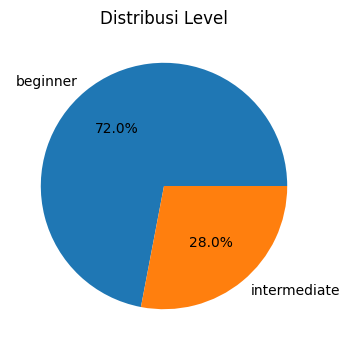

In [ ]:
df_categorical['level'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 4))
plt.title('Distribusi Level')
plt.ylabel('')
plt.show()

In [ ]:
# Proporsi kategori author
df_categorical['author'].value_counts(normalize=True) * 100

,proportion
author,
Ahmad Hakim,42.0
Aulia Rahman,16.0
Fika Ridaul Maulayya,10.0
Toni Haryanto,6.0
Muhammad Amirul Ihsan,4.0
Nur Indah Pratiwi,4.0
Hakim Sembiring Meliala,4.0
Sandhika Galih,2.0
Bagus Budi Cahyono,2.0


In [ ]:
# Hubungan antara 'author' dan 'level'
pd.crosstab(df_categorical['author'], df_categorical['level'])

level,beginner,intermediate
author,,
0,5,0
Aden Rahmandi,5,0
Ahmad Hakim,65,40
Aldi Zainafif,5,0
Aulia Rahman,20,20
Bagus Budi Cahyono,5,0
Fika Ridaul Maulayya,25,0
Hakim Sembiring Meliala,10,0
Muhammad Amirul Ihsan,5,5


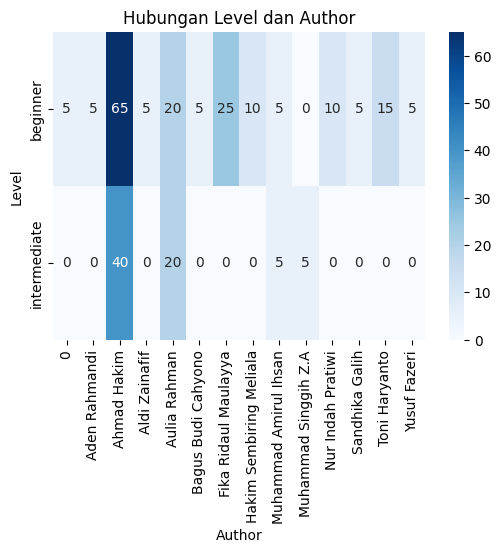

In [ ]:
heatmap_data_level_title = pd.crosstab(df_categorical['level'], df_categorical['author'])

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data_level_title, annot=True, fmt='d', cmap='Blues')
plt.title('Hubungan Level dan Author')
plt.xlabel('Author')
plt.ylabel('Level')
plt.show()

In [ ]:
# Hubungan antara 'author' dan 'title'
relation_author_title = pd.crosstab(df_categorical['author'], df_categorical['title'])
print("Hubungan antara Author dan Title:")
print(relation_author_title)

Hubungan antara Author dan Title:
title                    1 Jam Bisa Membuat Game dengan Construct 3  \
author                                                                
0                                                                 0   
Aden Rahmandi                                                     0   
Ahmad Hakim                                                       5   
Aldi Zainafif                                                     0   
Aulia Rahman                                                      0   
Bagus Budi Cahyono                                                0   
Fika Ridaul Maulayya                                              0   
Hakim Sembiring Meliala                                           0   
Muhammad Amirul Ihsan                                             0   
Muhammad Singgih Z.A                                              0   
Nur Indah Pratiwi                                                 0   
Sandhika Galih                             

In [ ]:
# Hubungan antara 'level' dan 'status'
relation = pd.crosstab(df_categorical['level'], df_categorical['status'])
print(relation)

status        publish
level                
beginner          180
intermediate       70


In [ ]:
# Hubungan antara 'title' dan 'level'
# Memilih 4 title teratas berdasarkan jumlah kemunculan
top_titles = df_categorical['title'].value_counts().nlargest(5).index

# Filter dataset hanya untuk 4 title teratas
df_top_titles = df_categorical[df_categorical['title'].isin(top_titles)]

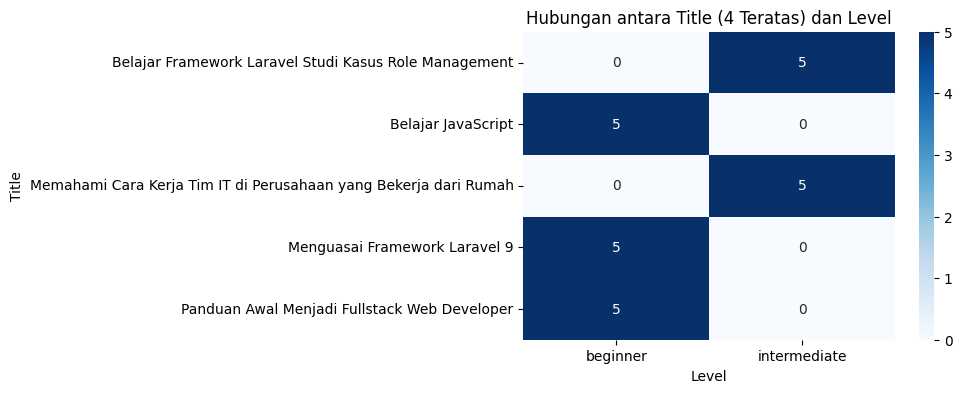

In [ ]:
heatmap_data = pd.crosstab(df_top_titles['title'], df_top_titles['level'])

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Hubungan antara Title (4 Teratas) dan Level')
plt.xlabel('Level')
plt.ylabel('Title')
plt.show()

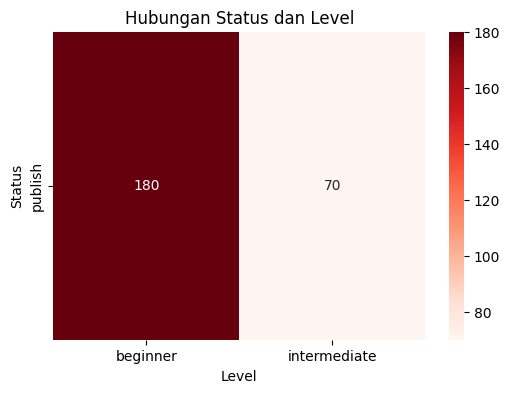

In [ ]:
heatmap_data_status_level = pd.crosstab(df_categorical['status'], df_categorical['level'])

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data_status_level, annot=True, fmt='d', cmap='Reds')
plt.title('Hubungan Status dan Level')
plt.xlabel('Level')
plt.ylabel('Status')
plt.show()

In [ ]:
# Hubungan antara 'title' dan 'level'
relation_title_level = pd.crosstab(df_categorical['title'], df_categorical['level'])
print("Hubungan antara Title dan Level:")
print(relation_title_level)

Hubungan antara Title dan Level:
level                                               beginner  intermediate
title                                                                     
1 Jam Bisa Membuat Game dengan Construct 3                 5             0
Android Development Starter Pack - Java                    5             0
Aplikasi Pemasaran Produk Android OLX Clone - K...         0             5
Belajar Cepat Membuat Web App Berbasis React               5             0
Belajar Dasar CSS                                          5             0
Belajar Dasar HTML                                         5             0
Belajar Framework Laravel Studi Kasus Role Mana...         0             5
Belajar JavaScript                                         5             0
Belajar Membangun RESTful dengan Adonis.js                 5             0
Belajar Pemrograman PHP                                    5             0
Belajar Vue.js 3 dan Firebase Studi Kasus Blog             5       

In [ ]:
# Hubungan antara 'level', 'title', dan 'status'
relation_complex = df_categorical.groupby(['level', 'title', 'status']).size().reset_index(name='count')
print("Hubungan antara Level, Title, dan Status:")
print(relation_complex)

Hubungan antara Level, Title, dan Status:
           level                                              title   status  \
0       beginner         1 Jam Bisa Membuat Game dengan Construct 3  publish   
1       beginner            Android Development Starter Pack - Java  publish   
2       beginner      Belajar Cepat Membuat Web App Berbasis React   publish   
3       beginner                                  Belajar Dasar CSS  publish   
4       beginner                                 Belajar Dasar HTML  publish   
5       beginner                                 Belajar JavaScript  publish   
6       beginner         Belajar Membangun RESTful dengan Adonis.js  publish   
7       beginner                            Belajar Pemrograman PHP  publish   
8       beginner     Belajar Vue.js 3 dan Firebase Studi Kasus Blog  publish   
9       beginner  Cara Mudah Buat Toko Online Sendiri dengan Wor...  publish   
10      beginner            Deploy Projek Machine Learning ke Cloud  publish  

# Gabungan Analisis Kategorikal dan numerikal

In [ ]:
# Gabungkan Data Berdasarkan Indeks
df_combined = pd.concat([df_categorical, df_numeric], axis=1)

<ipython-input-38-209d4eb933ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='level', y='normal_price', palette='muted')


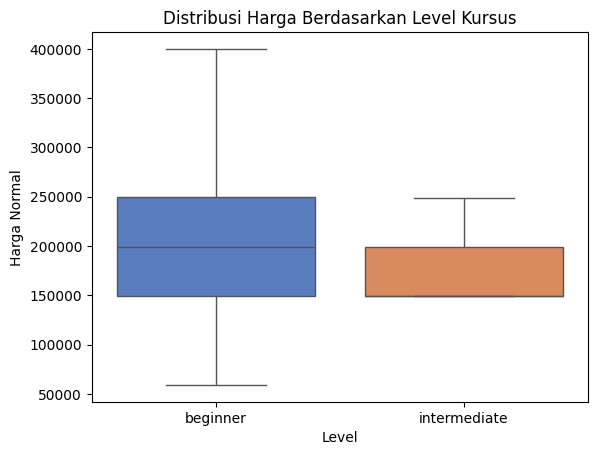

In [ ]:
# 1. Distribusi Harga Berdasarkan Tingkat Kesulitan
sns.boxplot(data=df_combined, x='level', y='normal_price', palette='muted')
plt.title('Distribusi Harga Berdasarkan Level Kursus')
plt.ylabel('Harga Normal')
plt.xlabel('Level')
plt.show()

<ipython-input-39-c2bb667a0c68>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top_authors, x='author', y='total_student', ci=None, palette='pastel')
<ipython-input-39-c2bb667a0c68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_authors, x='author', y='total_student', ci=None, palette='pastel')


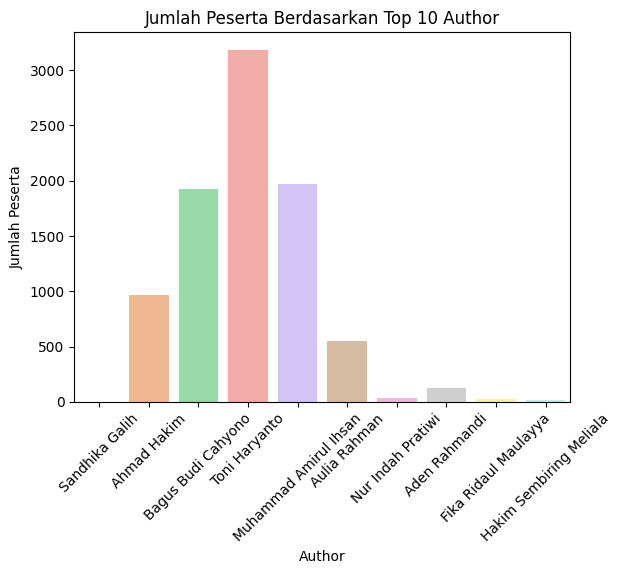

In [ ]:
# 2. Performa Kursus Berdasarkan Author
top_authors = df_combined['author'].value_counts().head(10).index
df_top_authors = df_combined[df_combined['author'].isin(top_authors)]

sns.barplot(data=df_top_authors, x='author', y='total_student', ci=None, palette='pastel')
plt.xticks(rotation=45)
plt.title('Jumlah Peserta Berdasarkan Top 10 Author')
plt.ylabel('Jumlah Peserta')
plt.xlabel('Author')
plt.show()

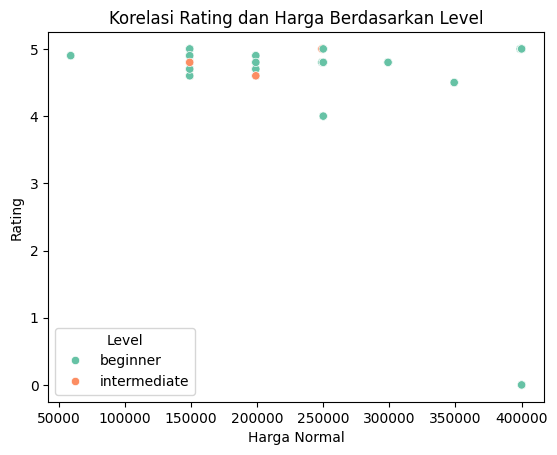

In [ ]:
# 3. Rating vs Harga
sns.scatterplot(data=df_combined, x='normal_price', y='total_rating', hue='level', palette='Set2')
plt.title('Korelasi Rating dan Harga Berdasarkan Level')
plt.xlabel('Harga Normal')
plt.ylabel('Rating')
plt.legend(title='Level')
plt.show()

<ipython-input-41-b8b58f4327ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, x='is_free', palette='cool')


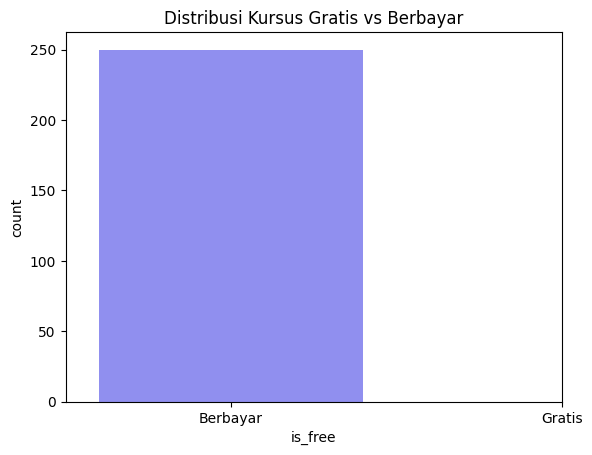

In [ ]:
# Analisis Kursus Gratis vs Berbayar
df_combined['is_free'] = df_combined['normal_price'] == 0
sns.countplot(data=df_combined, x='is_free', palette='cool')
plt.title('Distribusi Kursus Gratis vs Berbayar')
plt.xticks([0, 1], ['Berbayar', 'Gratis'])
plt.show()

<ipython-input-42-3d297425f705>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='level', y='total_time', palette='viridis')


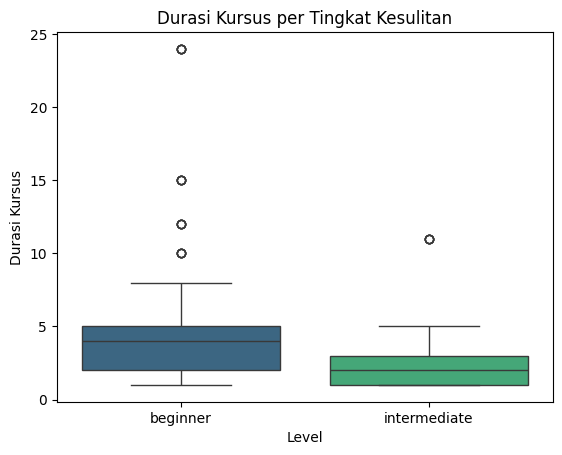

In [ ]:
# Durasi Kursus per Tingkat Kesulitan
sns.boxplot(data=df_combined, x='level', y='total_time', palette='viridis')
plt.title('Durasi Kursus per Tingkat Kesulitan')
plt.ylabel('Durasi Kursus')
plt.xlabel('Level')
plt.show()

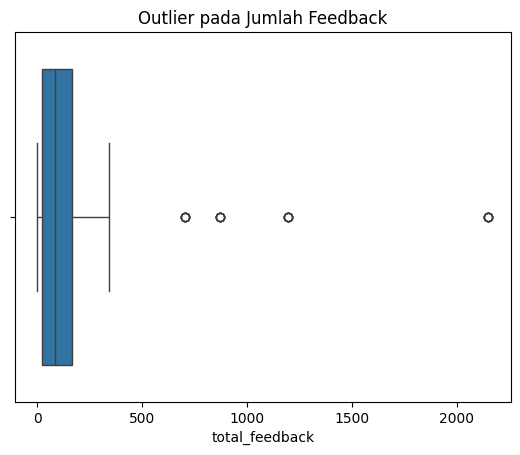

In [ ]:
# Outlier pada Jumlah Feedback
sns.boxplot(x=df_combined['total_feedback'])
plt.title('Outlier pada Jumlah Feedback')
plt.show()

In [ ]:
# 4. Nilai Kosong Gabungan
print("Nilai Kosong di Data Gabungan:")
print(df_combined.isnull().sum())

Nilai Kosong di Data Gabungan:
Unnamed: 0        0
title             0
status            0
level             0
author            0
Unnamed: 0.1      0
Unnamed: 0        0
total_module      0
total_time        0
total             0
normal_price      0
retail_price      0
rent_price        0
total_student     0
total_rating      0
total_feedback    0
is_free           0
dtype: int64


# Research Question

<ipython-input-58-a81c8f23e092>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


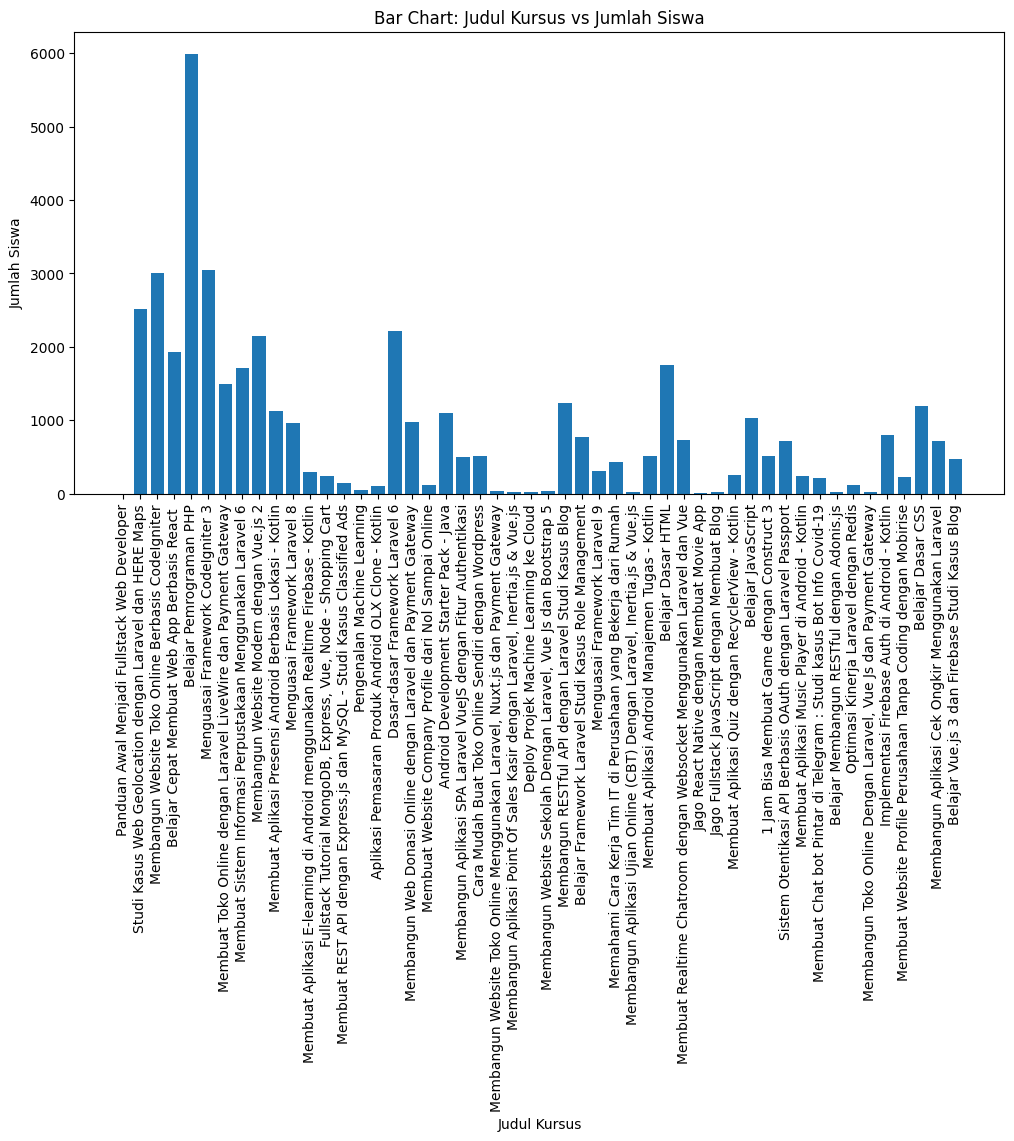

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_combined['title'], df_combined['total_student'])
plt.xlabel('Judul Kursus')
plt.ylabel('Jumlah Siswa')
plt.title('Bar Chart: Judul Kursus vs Jumlah Siswa')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# revisi baru
# judul kursus vs jumlah siswa

# Group by course title and sum the total students
course_student_counts = df_combined.groupby('title')['total_student'].sum()

# Create a DataFrame for better visualization
course_student_df = pd.DataFrame({'Course Title': course_student_counts.index,
                                  'Total Students': course_student_counts.values})

# Display the DataFrame
course_student_df

,Course Title,Total Students
0,1 Jam Bisa Membuat Game dengan Construct 3,2545
1,Android Development Starter Pack - Java,5495
2,Aplikasi Pemasaran Produk Android OLX Clone - ...,510
3,Belajar Cepat Membuat Web App Berbasis React,9625
4,Belajar Dasar CSS,5990
5,Belajar Dasar HTML,8795
6,Belajar Framework Laravel Studi Kasus Role Man...,3875
7,Belajar JavaScript,5165
8,Belajar Membangun RESTful dengan Adonis.js,85
9,Belajar Pemrograman PHP,29955


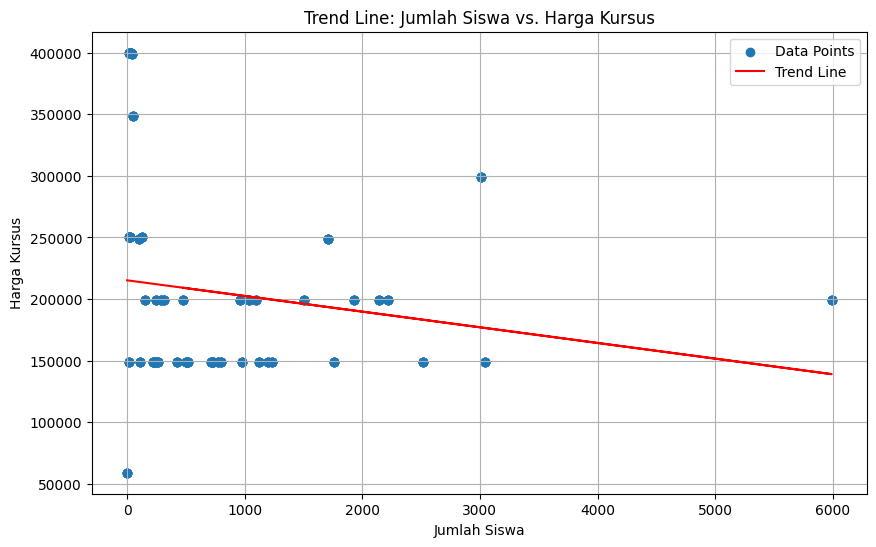

In [ ]:
# revisi
# 1. # 1. Trend line judul kursus vs jumlah siswa
# Prepare data
x = df_combined['total_student']
y = df_combined['normal_price']


# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create the trendline
trendline = slope * x + intercept

# Plot the data and trendline
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(x, y, label='Data Points')
plt.plot(x, trendline, color='red', label='Trend Line')

# Customize the plot
plt.xlabel('Jumlah Siswa')
plt.ylabel('Harga Kursus')
plt.title('Trend Line: Jumlah Siswa vs. Harga Kursus')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# 1. Kursus yang paling banyak diminati
most_popular_course = df_combined.loc[df_combined['total_student'].idxmax(), ['title', 'total_student']]

In [ ]:
# 2. Range harga kursus berdasarkan kategori level pembelajaran
price_ranges = df_combined.groupby('level').agg(min_price=('normal_price', 'min'), max_price=('normal_price', 'max'))

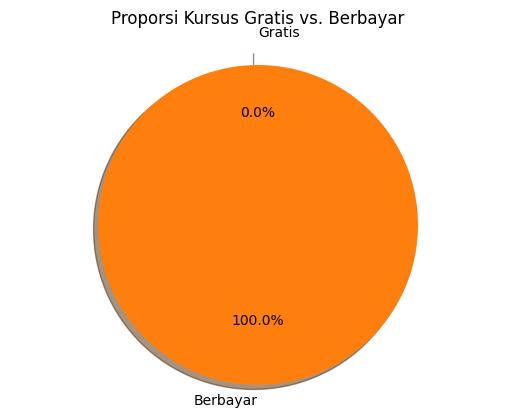

In [ ]:
# revisi
# 3. Pie plot kursus berbayar vs gratis dalam bentuk %
free_courses = df_combined[df_combined['is_free']].shape[0]
paid_courses = df_combined[~df_combined['is_free']].shape[0]
total_courses = free_courses + paid_courses

free_percentage = (free_courses / total_courses) * 100
paid_percentage = (paid_courses / total_courses) * 100

labels = ['Gratis', 'Berbayar']
sizes = [free_percentage, paid_percentage]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Proporsi Kursus Gratis vs. Berbayar')
plt.show()

In [ ]:
# 3. Jumlah total kursus terbaru (dalam status 'publish')
total_latest_courses = df_combined[df_combined['status'] == 'publish'].shape[0]

<ipython-input-51-0cc9c9460ee1>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping


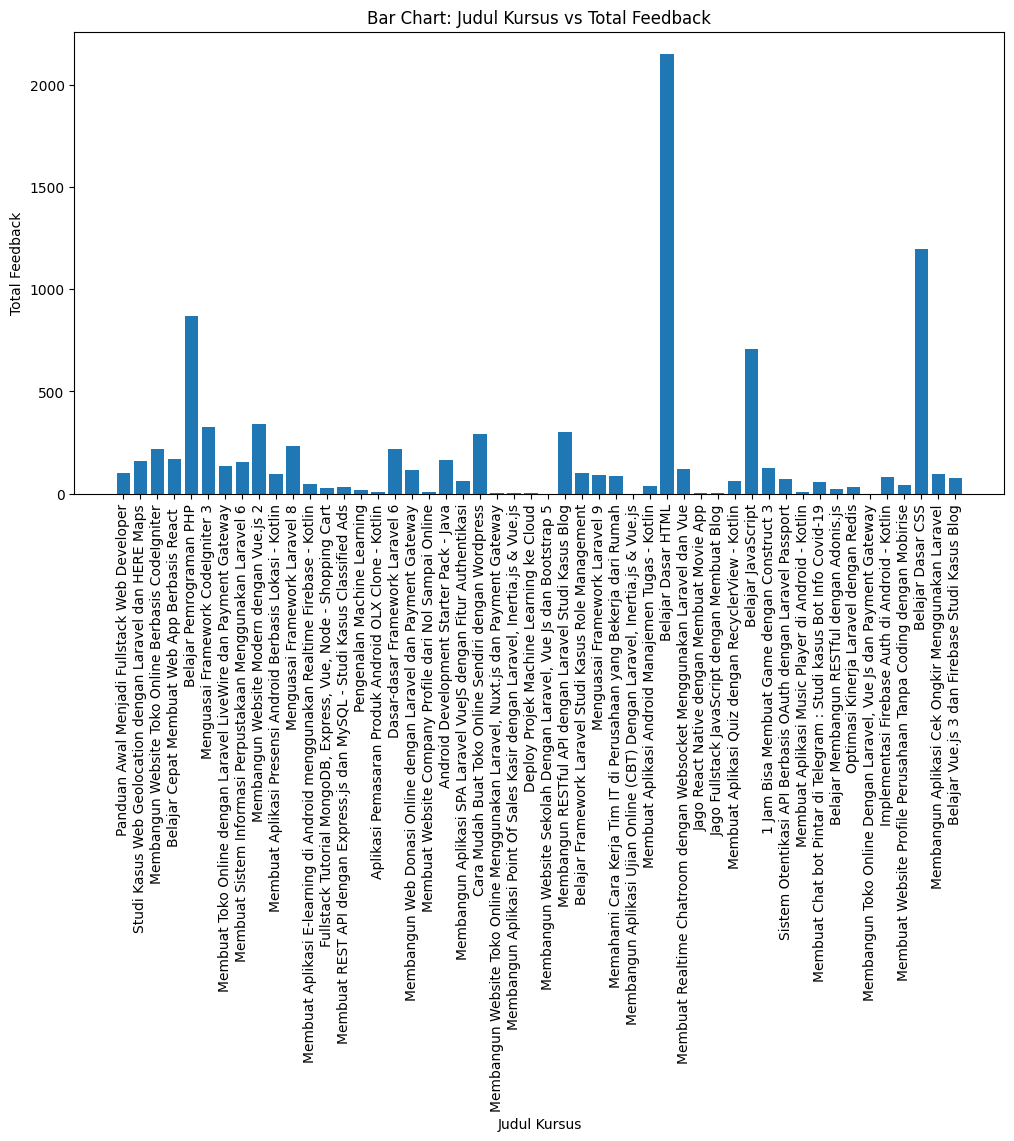

In [ ]:
# revisi
# 4. Bar chart judul kursus vs total_feedback
plt.figure(figsize=(12, 6))
plt.bar(df_combined['title'], df_combined['total_feedback'])
plt.xlabel("Judul Kursus")
plt.ylabel("Total Feedback")
plt.title("Bar Chart: Judul Kursus vs Total Feedback")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# 4. Jumlah total kursus gratis (Rp.0,-)
total_free_courses = df_combined[df_combined['normal_price'] == 0].shape[0]


In [ ]:
# 5. Jumlah total kursus populer (dengan >1000 peserta)
total_popular_courses = df_combined[df_combined['total_student'] > 1000].shape[0]


In [ ]:
# 6. Informasi durasi kursus tersedia
has_duration_info = df_combined['total_time'].notnull().all()


In [ ]:
 # revisi
# 7. Bar chart distribusi rating
plt.figure(figsize=(10, 6))
rating_distribution.plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Jumlah Kursus")
plt.title("Distribusi Rating Kursus")
plt.show()

NameError: name 'rating_distribution' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 7. Informasi jumlah modul tersedia
has_module_info = df_combined['total_module'].notnull().all()


In [ ]:
# revisi
# 8. Trend line harga vs rating berdasarkan level
# Group data by level
grouped = df_combined.groupby('level')

plt.figure(figsize=(10, 6))

# Iterate through each level and plot the trendline
for level, data in grouped:
    sns.regplot(x='normal_price', y='total_rating', data=data, label=level)

plt.xlabel('Harga')
plt.ylabel('Rating')
plt.title('Trendline Harga vs Rating per Level')
plt.legend()
plt.show()

In [ ]:
# 8. Kursus dengan feedback terbanyak
most_feedback_course = df_combined.loc[df_combined['total_feedback'].idxmax(), ['title', 'total_feedback']]


In [ ]:
# revisi
# 9.  Trend line harga vs jumlah siswa berdasarkan level
# Group data by level
grouped = df_combined.groupby('level')

plt.figure(figsize=(10, 6))

# Iterate through each level and plot the trendline
for level, data in grouped:
    sns.regplot(x='normal_price', y='total_student', data=data, label=level)

plt.xlabel('Harga')
plt.ylabel('Jumlah Siswa')
plt.title('Trendline Harga vs Jumlah Siswa per Level')
plt.legend()
plt.show()

In [ ]:
# 9. Level yang tersedia pada kursus terbaru, gratis, dan populer
levels_latest = df_combined[df_combined['status'] == 'publish']['level'].unique()
levels_free = df_combined[df_combined['normal_price'] == 0]['level'].unique()
levels_popular = df_combined[df_combined['total_student'] > 1000]['level'].unique()


In [ ]:
# revisi
# 10. Trend line rating vs jumlah siswa berdasarkan level
# Group data by level
grouped = df_combined.groupby('level')

plt.figure(figsize=(10, 6))

# Iterate through each level and plot the trendline
for level, data in grouped:
    sns.regplot(x='total_rating', y='total_student', data=data, label=level)

plt.xlabel('Rating')
plt.ylabel('Jumlah Siswa')
plt.title('Trendline Rating vs Jumlah Siswa per Level')
plt.legend()
plt.show()

In [ ]:
# 10. Apakah semua kursus memiliki ulasan dan rating
all_have_reviews = df_combined['total_feedback'].notnull().all()
all_have_ratings = df_combined['total_rating'].notnull().all()

In [ ]:
# 11. Bagaimana distribusi rating pada kursus, dan berapa nilai rata-rata rating dari seluruh kursus?
rating_distribution = df_combined['total_rating'].value_counts().sort_index()  # Distribusi rating
average_rating = df_combined['total_rating'].mean()  # Rata-rata rating


In [ ]:
#12. Apakah kursus dengan rating tinggi cenderung memiliki ulasan yang banyak?
high_rating_courses = df_combined[df_combined['total_rating'] > df_combined['total_rating'].median()]
high_rating_with_feedback = high_rating_courses[high_rating_courses['total_feedback'] > high_rating_courses['total_feedback'].median()]


In [ ]:
# 13. Apakah terdapat korelasi antara harga dengan rating?
price_rating_correlation = df_combined['normal_price'].corr(df_combined['total_rating'])


In [ ]:
# 14. Apakah terdapat korelasi antara harga dengan jumlah peserta?
price_students_correlation = df_combined['normal_price'].corr(df_combined['total_student'])


In [ ]:
# 15. Apakah terdapat korelasi antara rating dengan jumlah peserta?
rating_students_correlation = df_combined['total_rating'].corr(df_combined['total_student'])


In [ ]:
# Menyusun hasil analisis dalam bentuk dictionary
analysis_results = {
    "Most Popular Course": most_popular_course.to_dict(),
    "Price Range by Level": price_ranges.to_dict(),
    "Total Latest Courses": total_latest_courses,
    "Total Free Courses": total_free_courses,
    "Total Popular Courses": total_popular_courses,
    "Duration Info Available": has_duration_info,
    "Module Info Available": has_module_info,
    "Course with Most Feedback": most_feedback_course.to_dict(),
    "Levels in Latest Courses": list(levels_latest),
    "Levels in Free Courses": list(levels_free),
    "Levels in Popular Courses": list(levels_popular),
    "All Courses Have Reviews": all_have_reviews,
    "All Courses Have Ratings": all_have_ratings,
    "All Courses Have Reviews": all_have_reviews,
    "All Courses Have Ratings": all_have_ratings,
    "Rating Distribution": rating_distribution.to_dict(),
    "Average Rating": average_rating,
    "High Rating Courses with Feedback": high_rating_with_feedback[['title', 'total_rating', 'total_feedback']].to_dict(),
    "Price-Rating Correlation": price_rating_correlation,
    "Price-Students Correlation": price_students_correlation,
    "Rating-Students Correlation": rating_students_correlation,
}

In [ ]:
# Output hasil analisis
for key, value in analysis_results.items():
    print(f"{key}:\n{value}\n")